# NLP Text Classification of Movie Reviews using Tensorflow
* Notebook by Adam Lang
* Date: 4/22/2024
* In this notebook we will perform a text classification task using the IMDB movie review dataset using Tensorflow.

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get dataset from Keras

In [2]:
imdbReviews = keras.datasets.imdb



#### Setup train and test sets

In [3]:
## setup train and test sets limit words to 10000
(train_data, train_label), (test_data, test_labels) = imdbReviews.load_data(num_words=10000)

### Let's look at the train_data and train labels length

In [4]:
print(f"Train data length: {len(train_data)}")
print(f"Train labels length: {len(train_label)}")

Train data length: 25000
Train labels length: 25000


### Look at train_data sample

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
## index into dict - use this for padding
Dict = imdbReviews.get_word_index()
Dict = {k:(v+3) for k,v in Dict.items()}

In [7]:
Dict["<PAD>"]=0
Dict["<START>"]=1
Dict["<UNK>"]=2
Dict["<UNUSED>"]=3

# setup reverse dict to return keys and values
Rev_Dict = dict([(value,key) for (key,value) in Dict.items()])

In [8]:
## create function to reverse and decode the values
def decode_reviews(text):
  return ' '.join([Rev_Dict.get(i,"?") for i in text])

In [9]:
## lets look at train data again
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
## now decode text for first sample
decode_reviews(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

Note: We can see the padding in the text sample above.

### Pre-processing data and text
* Padding docs: https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences

In [11]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = Dict["<PAD>"],padding="post",maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value = Dict["<PAD>"], padding="post", maxlen=256)

In [12]:
## print train data length of sample
print(f"The train data length is: {len(train_data[4])}")

The train data length is: 256


In [13]:
## print out decoded padding sample
decode_reviews(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

### Define Neural Network model
* Model will separate good movie reviews from bad movie reviews.

In [14]:
vocab_size = 10000

model = keras.Sequential() #linear model 1 input tensor, 1 output tensor

#### Network Layer specifics from Tensorflow docs:
1. First layer is an Embedding layer. This layer takes the integer-encoded reviews and looks up an embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding). To learn more about embeddings, check out the Word embeddings tutorial.

2. Next layer is GlobalAveragePooling1D layer which returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
source: https://www.tensorflow.org/tutorials/keras/text_classification

In [15]:
## add embedding layers
model.add(keras.layers.Embedding(vocab_size,16)) #input size
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation = tf.nn.relu)) ## activation function relu, first hidden layer
model.add(keras.layers.Dense(1,activation = tf.nn.sigmoid)) ## output layer

### Model Summary

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Compile model

In [17]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

In [18]:
## validation dataset
x_val = train_data[:10000]

In [19]:
x_train = train_data[10000:]

In [20]:
y_val = train_label[:10000]

In [21]:
y_train = train_label[10000:]

### Train model

In [22]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/10
118/118 [==============================] - 7s 28ms/step - loss: 0.6861 - acc: 0.5835 - val_loss: 0.6712 - val_acc: 0.7359
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.6256 - acc: 0.7747 - val_loss: 0.5754 - val_acc: 0.8031
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.5011 - acc: 0.8370 - val_loss: 0.4550 - val_acc: 0.8429
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.3881 - acc: 0.8734 - val_loss: 0.3763 - val_acc: 0.8614
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.3175 - acc: 0.8900 - val_loss: 0.3361 - val_acc: 0.8696
Epoch 6/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2729 - acc: 0.9039 - val_loss: 0.3101 - val_acc: 0.8782
Epoch 7/10
118/118 [==============================] - 2s 19ms/step - loss: 0.2408 - acc: 0.9147 - val_loss: 0.2966 - val_acc: 0.8825
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - 

### Evaluate model performance

In [23]:
## accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_val, np.where(model.predict(x_val)[:,0] < 0.5, 0, 1)))

313/313 [==============================] - 1s 2ms/step
Accuracy on validation set: 0.8868


### Plot the loss

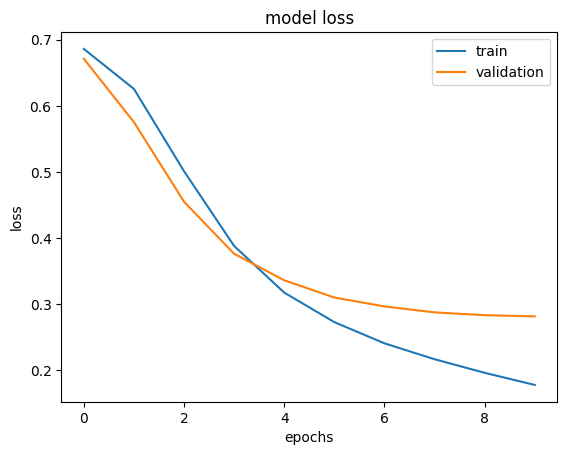

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show();

Summary:
* The loss drops quickly for both train and test until around 4 epochs when the test or validation loss stays higher and levels off and the train loss continues to drop to zero.
* It appears the model is overfitting the data.

### Plot model accuracy

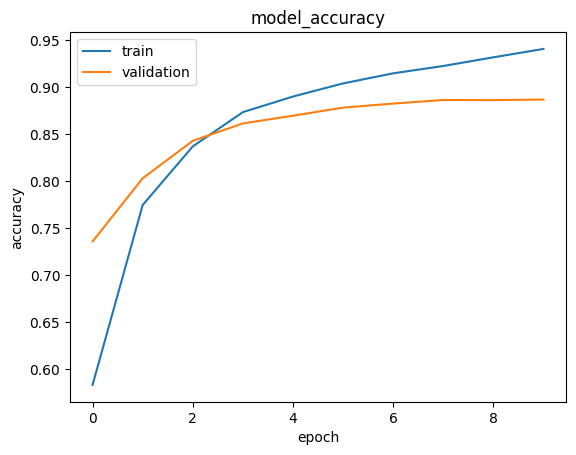

In [25]:
#visualize model accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show();

Summary:
* It looks like the accuracy begins to level off for both train and test data at around 3 epochs.
* The best accuracy for both was around 85 - 88%.